In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", color_codes=True)
from google.colab import files

#uploaded = files.upload()

In [45]:
df = pd.read_csv('/content/vgames2.csv').rename(columns = {'Unnamed: 0':'index'})
df.drop('index', axis = 1, inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [46]:
print(' 데이터의 구조')
print(df.shape)
print('\n 데이터의 정보')
df.info()

 데이터의 구조
(16598, 9)

 데이터의 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [47]:
df[df.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [48]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [49]:
p = df.iloc[:,5:]
p

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
...,...,...,...,...
16592,0.15,0.04,0,0.01
16593,0.01,0,0,0
16594,0.44,0.19,0.03,0.13
16595,0.05,0.05,0.25,0.03


In [50]:
def millions(x):
    return x / 1000000
for col in p.columns:
    for i in range(len(p[col])):
        value = p[col][i]
        if isinstance(value, str):
            if value.replace(".", "").isdigit():
                p[col][i] = float(value) * 1000000
            elif value.endswith('K'):
                p[col][i] = float(value[:-1]) * 1000  
            elif value.endswith('M'):
                p[col][i] = float(value[:-1]) * 1000000  
df.iloc[:, 5:] = p.apply(millions)

In [51]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [52]:
# droping missing year
df.dropna(subset=["Year"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [53]:
mp =df["Publisher"].value_counts().idxmax()
df["Publisher"].replace(np.nan, mp, inplace=True)
df["Publisher"].isnull().value_counts()

False    16327
Name: Publisher, dtype: int64

In [54]:
genre_list = df.Genre.unique()
df.loc[df.Genre.isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
49,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
404,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.0,0.02
1312,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.0,0.02
1562,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.0,0.04,0.0,0.57
1946,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79
2017,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0.0,0.03
2460,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0.0,0.0
3301,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0.0,0.03
3311,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0.0,0.0,0.0
3417,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0.0,0.0


In [55]:
df.dropna(subset=["Genre"], axis=0, inplace=True)

In [56]:
#df.fillna("Unknown",inplace=True)

In [57]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,0.02,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.0,0.04
...,...,...,...,...,...,...,...,...,...
16322,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.0,0.01
16323,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.0,0.0,0.0
16324,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16325,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [58]:
df['Year'] = df.Year.astype('int')
df['NA_Sales'] = df['NA_Sales'].astype('float64')
df['EU_Sales'] = df['EU_Sales'].astype('float64')
df['JP_Sales'] = df['JP_Sales'].astype('float64')
df['Other_Sales'] = df['Other_Sales'].astype('float64')

In [59]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,1994.206365,0.264964,0.147202,0.078111,0.048134
std,155.313461,0.821587,0.507802,0.308951,0.189480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


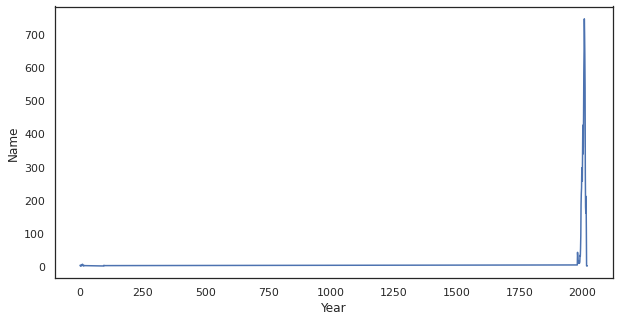

In [60]:
df_1 = df[["Year","Name"]].drop_duplicates(subset=["Name"],keep=False)
df_1 = df_1.groupby("Year").count()

plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df_1,x='Year',y='Name' )

plt.show()

In [61]:
df_1

,Name
Year,
0,3
1,1
3,3
4,1
5,3
6,4
7,2
8,5
9,6


In [18]:
def year_1(x):
  if x <= 20:
    return x + 2000
  elif x <= 100:
    return x + 1900
  else:
    return x

df['Year'] = df['Year'].apply(year_1)

In [19]:
df= df[df["Year"]<2016]

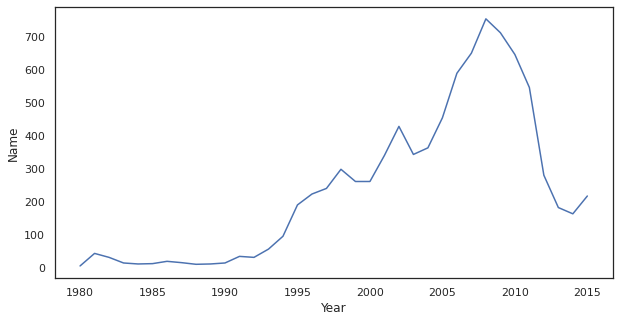

In [20]:
df_1 = df[["Year","Name"]].drop_duplicates(subset=["Name"],keep=False)
df_1 = df_1.groupby("Year").count()
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df_1,x='Year',y='Name' )
plt.show()

In [21]:
df.shape

(15929, 9)

In [22]:
df.loc[:, 'Total_Sales'] = df.iloc[:, 5:].sum(axis=1)

In [23]:
conditions = [df['Year'] <= 1985,
              (df['Year'] > 1985) & (df['Year'] <=1990),
              (df['Year'] > 1990) & (df['Year'] <=1995),
              (df['Year'] > 1995) & (df['Year'] <=2000), 
              (df['Year'] > 2000) & (df['Year'] <= 2005),
              (df['Year'] > 2005) & (df['Year'] <= 2010),
              (df['Year'] > 2010) & (df['Year'] <= 2015),
]
values = ['1980-1985','1985-1990','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']

df['Years'] = np.select(conditions,values)
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Years
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2005-2010
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2005-2010
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2005-2010
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2005-2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2005-2010
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,2000-2005
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,2010-2015
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,2000-2005
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04,2005-2010
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,2010-2015


지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?


지역은 어떻게 구분했는지 설명함

지역별로 선호하는 게임의 장르를 파악함

지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

In [24]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Years'],
      dtype='object')

In [25]:
genre_sales = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_sales.columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
gs_grouped = genre_sales.groupby(['Genre']).sum()
gs_gt = gs_grouped.reset_index()

gs_gt.columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
gs_gt.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,852.91,507.28,150.81,182.16
1,Adventure,101.58,63.32,50.92,16.59
2,Fighting,218.75,98.75,86.50,35.69
3,Misc,400.07,210.11,103.37,72.71
4,Platform,444.59,199.78,130.42,51.14


In [26]:
gs_gt_melt = pd.melt(gs_gt, id_vars=['Genre'], value_vars=gs_gt.columns[1:],
                      var_name='Country', value_name='Volume')
gs_gt_melt.head()

,Genre,Country,Volume
0,Action,NA_Sales,852.91
1,Adventure,NA_Sales,101.58
2,Fighting,NA_Sales,218.75
3,Misc,NA_Sales,400.07
4,Platform,NA_Sales,444.59


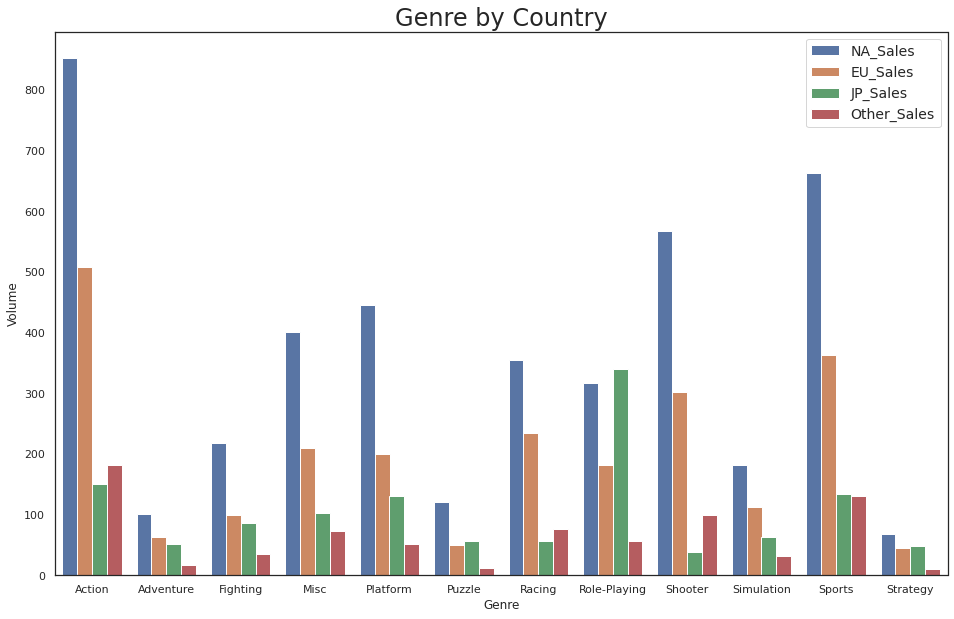

In [27]:
plt.figure(figsize=(16, 10))
sns.barplot(data=gs_gt_melt, x='Genre', y='Volume', hue='Country')
plt.title('Genre by Country', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

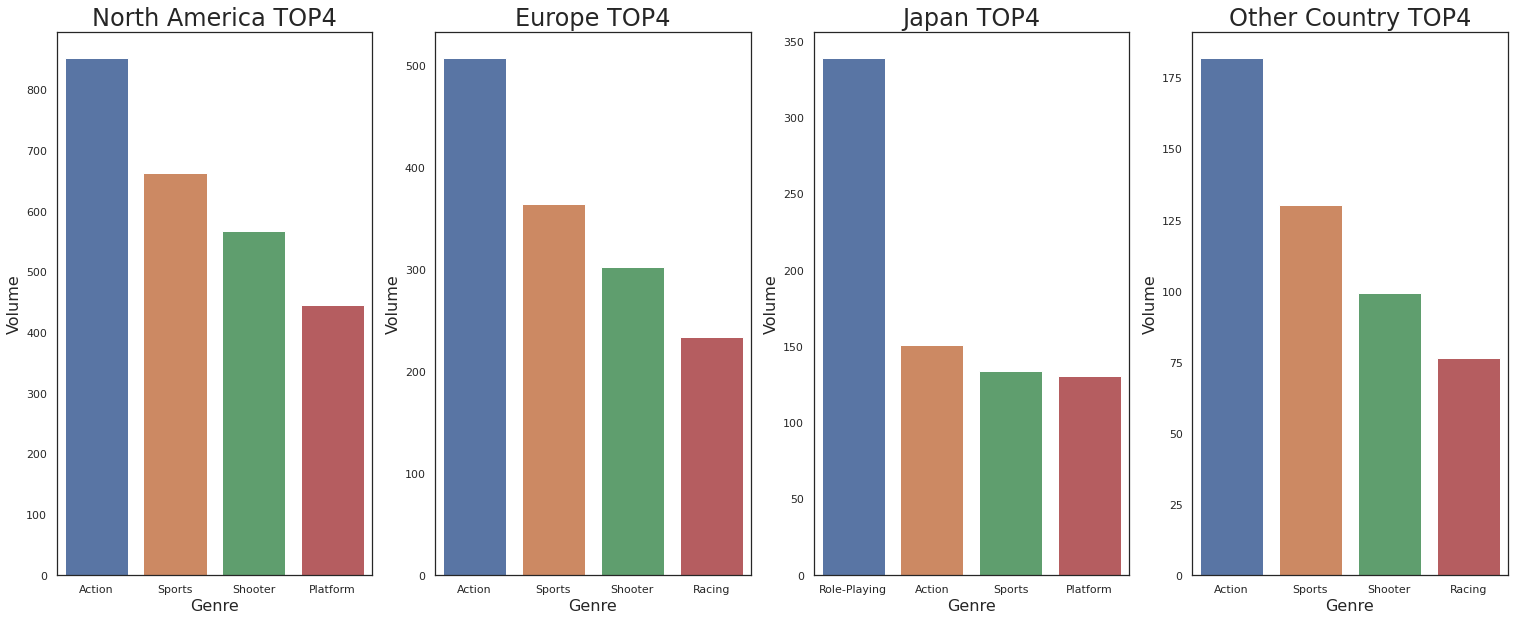

In [28]:
#TOP4 함수만들기
def top4(df, p):
    new_df = df.loc[:, ['Genre', p]].sort_values(by=p, ascending=False).reset_index(drop=True).head(4)
    new_df.columns = ['Genre', 'Volume']
    return new_df
#TOP3 데이터셋 만들기
na_top4 = top4(gs_gt, 'NA_Sales')
eu_top4 = top4(gs_gt, 'EU_Sales')
jp_top4 = top4(gs_gt, 'JP_Sales')
other_top4 = top4(gs_gt, 'Other_Sales')
#그래프 그리기
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)
sns.barplot(x='Genre', y='Volume', data=na_top4, ax=axs[0])
axs[0].set_title('North America' + ' ' + 'TOP4', fontsize=24)
axs[0].set_xlabel('Genre', fontsize=16)
axs[0].set_ylabel('Volume', fontsize=16)
sns.barplot(x='Genre', y='Volume', data=eu_top4, ax=axs[1])
axs[1].set_title('Europe' + ' ' + 'TOP4', fontsize=24)
axs[1].set_xlabel('Genre', fontsize=16)
axs[1].set_ylabel('Volume', fontsize=16)
sns.barplot(x='Genre', y='Volume', data=jp_top4, ax=axs[2])
axs[2].set_title('Japan' + ' ' + 'TOP4', fontsize=24)
axs[2].set_xlabel('Genre', fontsize=16)
axs[2].set_ylabel('Volume', fontsize=16)
sns.barplot(x='Genre', y='Volume', data=other_top4, ax=axs[3])
axs[3].set_title('Other Country' + ' ' + 'TOP4', fontsize=24)
axs[3].set_xlabel('Genre', fontsize=16)
axs[3].set_ylabel('Volume', fontsize=16)
plt.show()

In [29]:
from scipy.stats import chi2_contingency
gs_gt_c = gs_gt.copy()
gs_gt_c = gs_gt_c.iloc[:,1:]
chi2_val, p, dof, expected= chi2_contingency(gs_gt_c, correction=False)
if(p<0.05) : 
    print('p value:', p,"\n", '귀무가설을 기각합니다. 지역별로 선호하는 게임의 장르가 다릅니다.')
else :
    print('p value:', p,"\n", '귀무가설을 기각하지 않습니다. 지역별로 선호하는 게임의 장르가 같습니다.')
print('\n')
# 일본을 제외한 경우
temp_table2 = gs_gt_c.drop(['JP_Sales'], axis=1)
chi2_val, p, dof, expected= chi2_contingency(temp_table2, correction=False)
if(p<0.05) : 
    print('일본제외 p value:', p,"\n", '귀무가설을 기각합니다. 일본을 제외한 지역별로 선호하는 게임의 장르가 다릅니다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 않않습니다. 일본을 제외한 지역별로 선호하는 게임의 장르가 같습니다.')

p value: 1.2286545737468995e-121 
 귀무가설을 기각합니다. 지역별로 선호하는 게임의 장르가 다릅니다.


일본제외 p value: 0.024836362731111176 
 귀무가설을 기각합니다. 일본을 제외한 지역별로 선호하는 게임의 장르가 다릅니다.


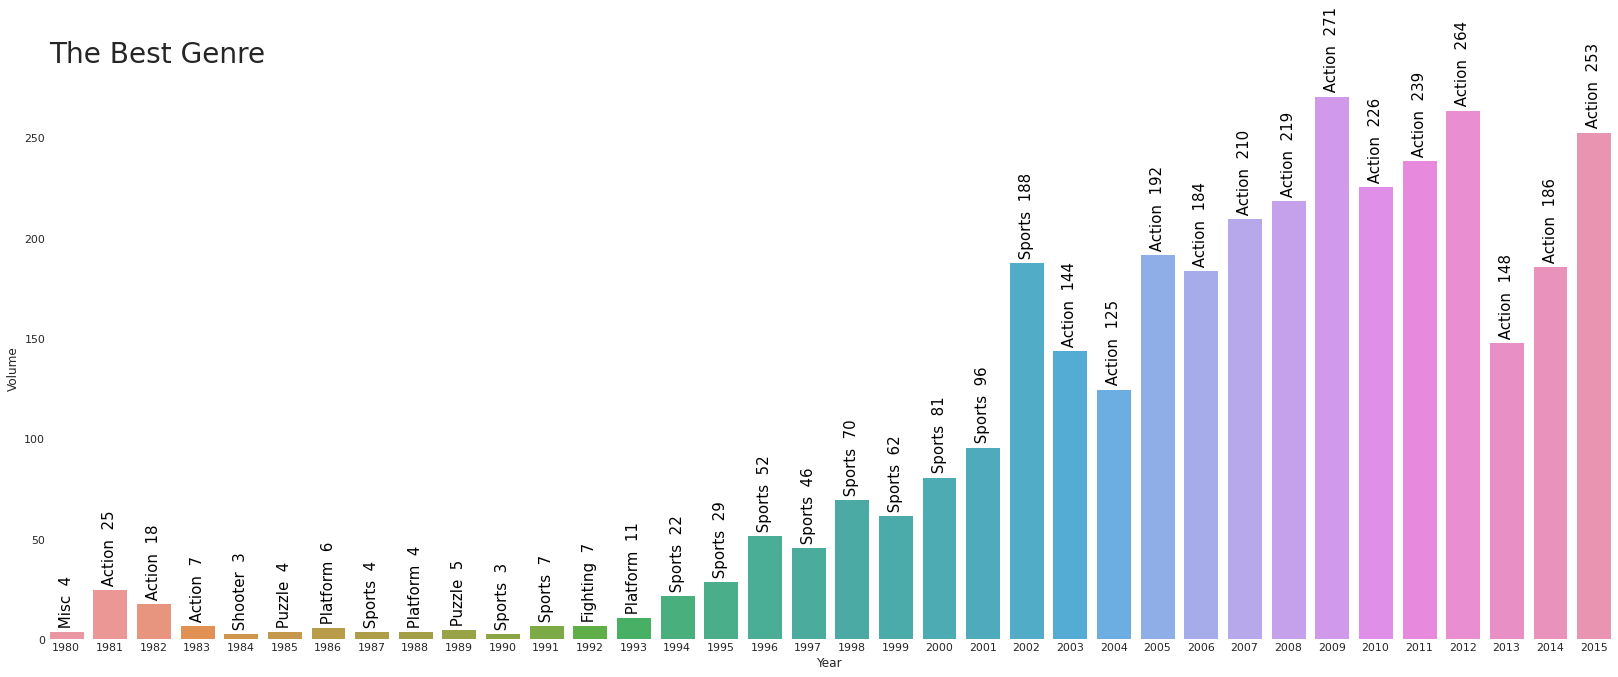

In [30]:
genre_year = df[['Genre', 'Year']]
genre_year.columns = ['Genre', 'Year']
gy_grouped = genre_year.groupby(['Year', 'Genre']).size().reset_index(name = 'Volume')
gy_grouped_max = gy_grouped.groupby("Year")['Volume'].max().reset_index()
gyg_max = gy_grouped.merge(gy_grouped_max, on=['Year', 'Volume'], how='inner')

gyg_max_dupled = gyg_max.drop_duplicates(subset=['Year','Volume'], keep='last').reset_index(drop=True)
genre = gyg_max_dupled['Genre'].values
plt.figure(figsize=(28,10))
ax=sns.barplot(x='Year', y='Volume', data=gyg_max_dupled)
plt.title('The Best Genre', fontsize=28, y=1.05, loc='left')

index = 0
for value in gyg_max_dupled['Volume']:
    ax.text(index, value + 1, ' ' +str(genre[index] + '  ' +str(value)), color='black', size=15, rotation= 90, ha="center")
    index += 1
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)
plt.margins(0)


plt.show()

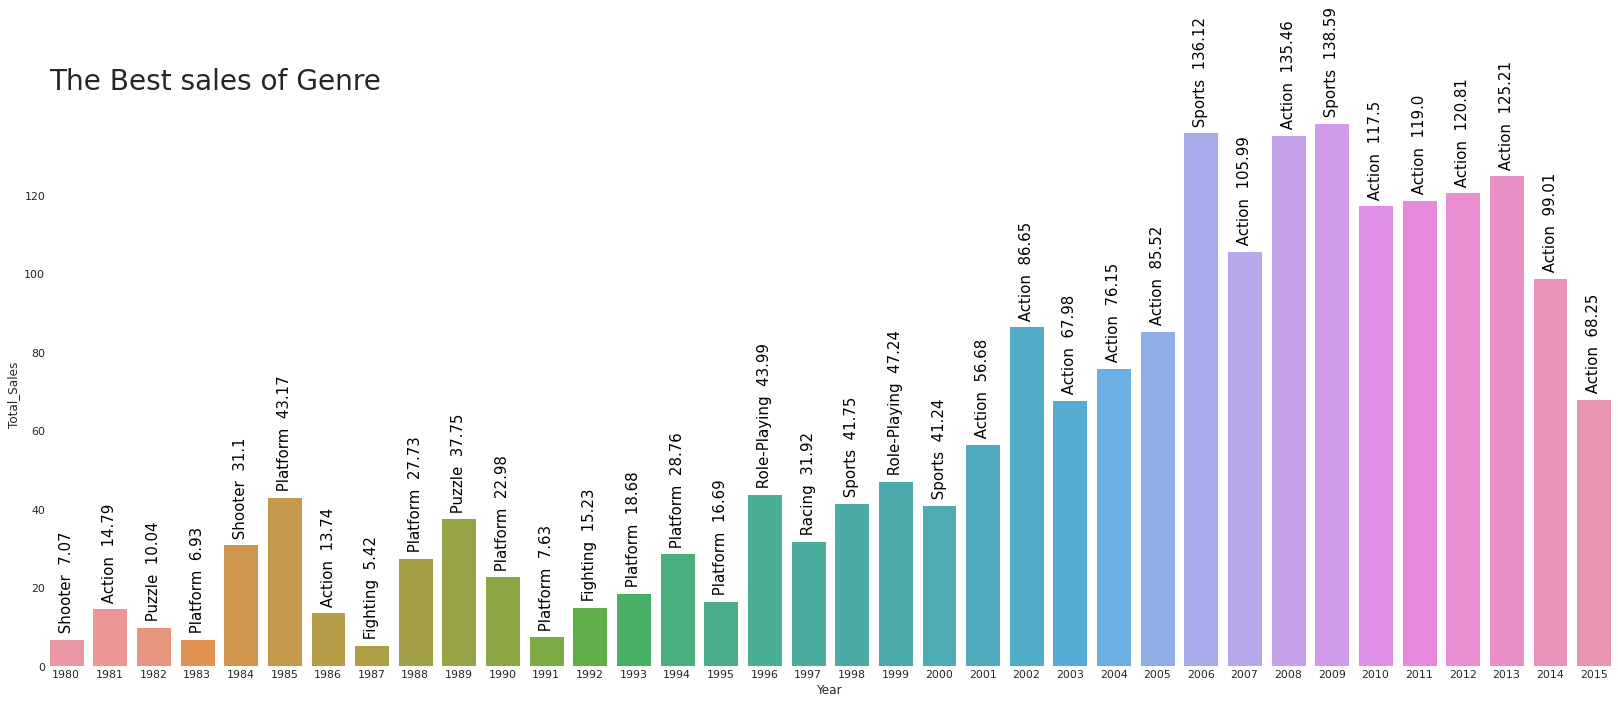

In [31]:
genre_sales = df[['Year', 'Genre', 'Total_Sales']]
genre_sales.columns = ['Year', 'Genre', 'Total_Sales']
gs_grouped = genre_sales.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
gs_grouped_max = gs_grouped.groupby(['Year'])['Total_Sales'].max().reset_index()
gst_grouped_max = pd.merge(gs_grouped, gs_grouped_max, on=['Year', 'Total_Sales'])
gst_grouped_max = gst_grouped_max[['Year', 'Genre', 'Total_Sales']]
genre = gst_grouped_max['Genre'].values

plt.figure(figsize=(28,10))
ax=sns.barplot(x='Year', y='Total_Sales', data=gst_grouped_max)
plt.title('The Best sales of Genre', fontsize=28, y=1.05, loc='left')

index = 0
for value in gst_grouped_max['Total_Sales']:
    ax.text(index, value + 1, ' ' +str(genre[index] + '  ' +str(round(value, 2))), color='black', size=15, rotation= 90, ha="center")
    index += 1
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)
plt.margins(0)
plt.show()

In [32]:
filtered_data = df[(df['Year'] == 2009) & (df['Genre']== 'Sports')]
filtered_data.sort_values(by = 'Total_Sales', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Years
3300,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2005-2010
10729,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,2005-2010
10430,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,Sega,1.89,1.99,0.22,0.48,4.58,2005-2010
9491,EA Sports Active,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92,2005-2010
4792,FIFA Soccer 10,PS3,2009,Sports,Electronic Arts,0.60,2.46,0.05,0.52,3.63,2005-2010


In [33]:
filtered_data = df[(df['Year'] == 2006) & (df['Genre']== 'Sports')]
filtered_data.sort_values(by = 'Total_Sales', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Years
2867,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2005-2010
14675,Madden NFL 07,PS2,2006,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49,2005-2010
12818,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.40,2005-2010
15333,FIFA Soccer 07,PS2,2006,Sports,Electronic Arts,0.71,2.48,0.03,0.89,4.11,2005-2010
2907,Madden NFL 07,X360,2006,Sports,Electronic Arts,1.66,0.00,0.01,0.13,1.80,2005-2010


In [34]:
filtered_data = df[df['Name'] == 'Wii Sports']
filtered_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Years
2867,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2005-2010


기존 액션 장르를 따라가던 게임트렌드에서 2006년과 2009년에 스포츠 장르가 우세를 띄는 그래프를 보여줍니다. 그 이유로 2006년에 wii 스포츠에 사용자의 팔동작을 인식하는 모션 인식 조이스틱이 최초로 접목한 게임이어서 그당시 압도적인 판매량을 기록했다. 2009년에는 위스포츠리조트는 그 모션인식을 더 민감하게 인식하는 모션플러스 하드웨어를 접목하게 되어 판매량이 많은것을 알수있다. 또 위플러스로 사용자의 균형 몸무게 bmi 측정을 해주며 그 기술로 인해 판매량이 또 증가한것으로 보인다.


연도별로 게임의 트랜드가 있다고 봅니다.
2000년데 초반에 액션 장르를 많이 발매가 되고 또 많이 판매되는 장르여서 액션 장르의 게임이 선호가 높다고봅니다.
하지만 2006년도에 기존의 게임사업을 바꿀만한 획기적인 게임 컨트롤러를 닌텐도 wii 에서발명했습니다. 
Wii Sports 게임에서는 Wii 리모트를 사용하여 골프채를 휘두르거나, 볼링공을 던지는 등의 동작을 실제로 수행하는 것과 같은 체험을 제공합니다. 이러한 기능들은 Wii 콘솔과 Wii Sports 게임을 통해 게임 산업에 큰 혁신을 가져왔으며, 많은 판매량을 기록할수있었습니다.
또한 2009년에는 wii 리모트의 모션인식을 더 민감하게하는 모션플러스 하드웨어를 접독하여서 Wii Sports Resort 게임이 가장높은 판매량을 기록한것을 볼수있습니다.







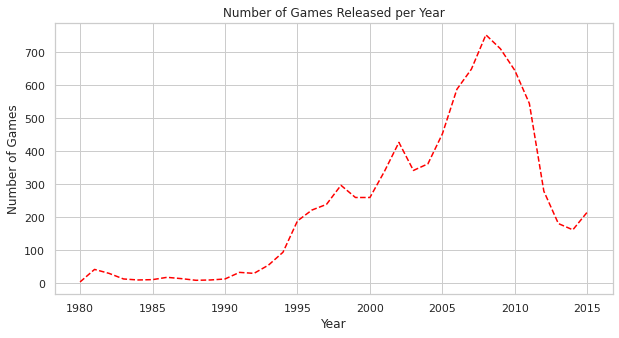

In [35]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.lineplot(data=df_1,x='Year',y='Name', color="red", linestyle="--")
plt.title("Number of Games Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.grid(True)
plt.show()


In [36]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [37]:
platform_dic = dict.fromkeys(df['Platform'])
platform_dic = {'DS': 'Nintendo', 'Wii': 'Nintendo', 'PSP': 'Sony', 'PS3': 'Sony', 'PC': 'Microsoft', 'PS': 'Sony', 'GBA': 'Nintendo', 'PS4': 'Sony', 'PS2': 'Sony', 'XB': 'Microsoft',
       'X360': 'Microsoft', 'GG': 'Sega', '3DS': 'Nintendo', '2600': 'Atari' , 'SAT': 'Sega', 'GB': 'Nintendo', 'NES': 'Nintendo', 'DC': 'Sega', 'N64': 'Nintendo',
       'XOne': 'Microsoft', 'SNES': 'Nintendo', 'WiiU': 'Nintendo', 'PSV': 'Sony', 'GEN': 'Sega', 'SCD': 'Sega', 'WS': 'Bandai', 'NG': 'SNK', 'TG16': 'HS & NEC',
       '3DO': '3D0', 'GC': 'Nintendo', 'PCFX': 'NEC'}

df["Developer"] = df['Platform'].map(platform_dic)
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Years,Developer
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2005-2010,Nintendo
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2005-2010,Nintendo
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2005-2010,Sony
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2005-2010,Nintendo
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2005-2010,Sony
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,2000-2005,Nintendo
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,2010-2015,Microsoft
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,2000-2005,Sony
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04,2005-2010,Sony
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,2010-2015,Sony


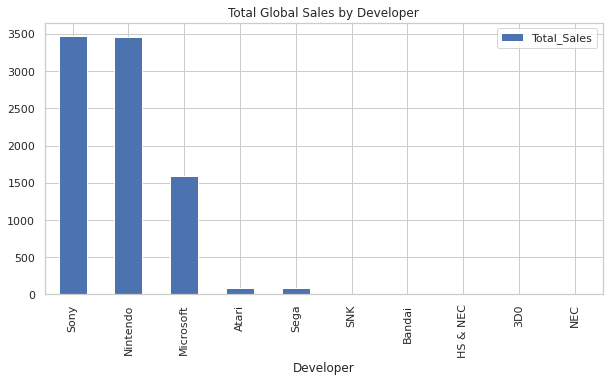

In [38]:
df[['Total_Sales','Developer']].groupby('Developer').sum().sort_values(by='Total_Sales', ascending = False).plot.bar(figsize = (10,5))
plt.title("Total Global Sales by Developer");


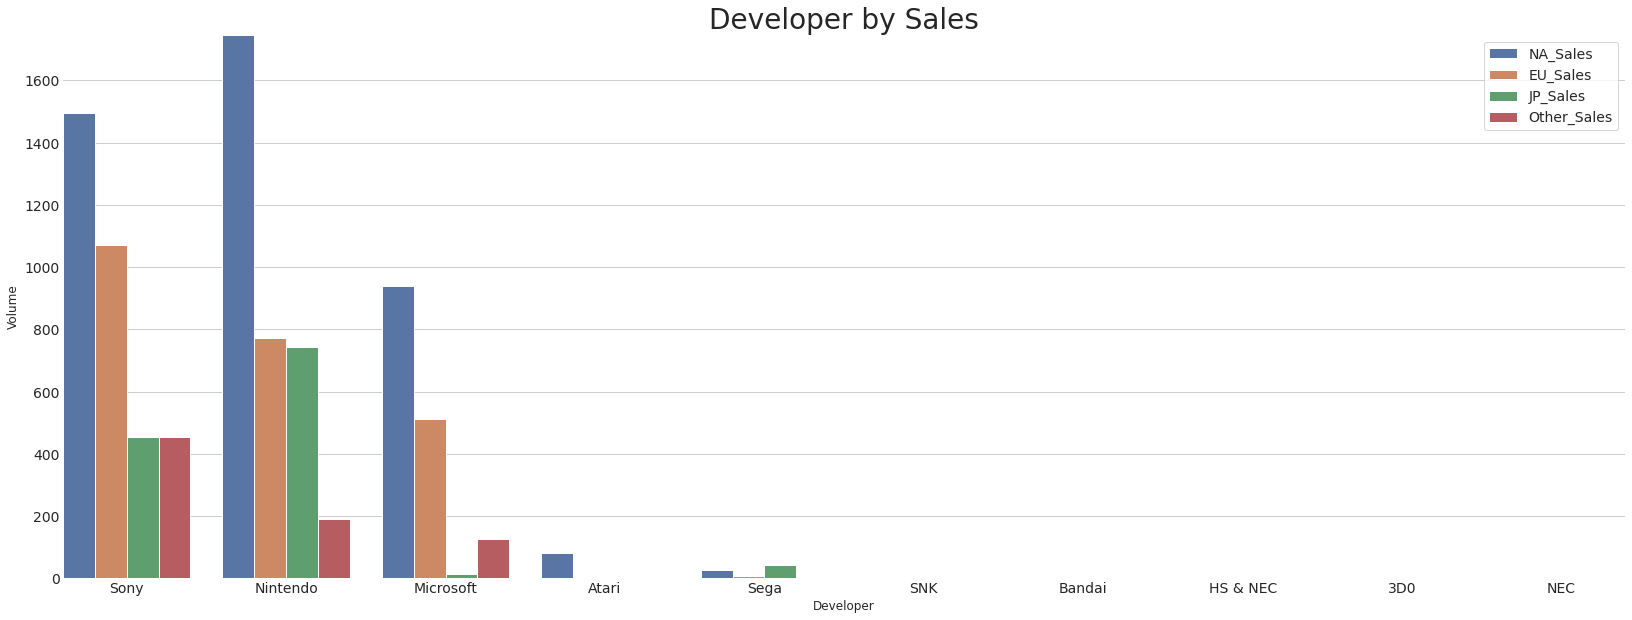

In [39]:
dev_sales = df[['Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
dev_sales.columns = ['Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']

dev_sales_grouped = dev_sales.groupby(by=['Developer']).sum()

dev_sales_df = dev_sales_grouped.reset_index().sort_values(by=['Total_Sales'], ascending=False).head(10)
dev_sales_mt = pd.melt(dev_sales_df, id_vars=['Developer'], value_vars=dev_sales.columns[1:-1],var_name='Country', value_name='Volume')


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Developer', y='Volume', hue='Country', data=dev_sales_mt)
ax.set_title('Developer by Sales', fontsize=28)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)
plt.margins(0)
plt.show()
plt.show()

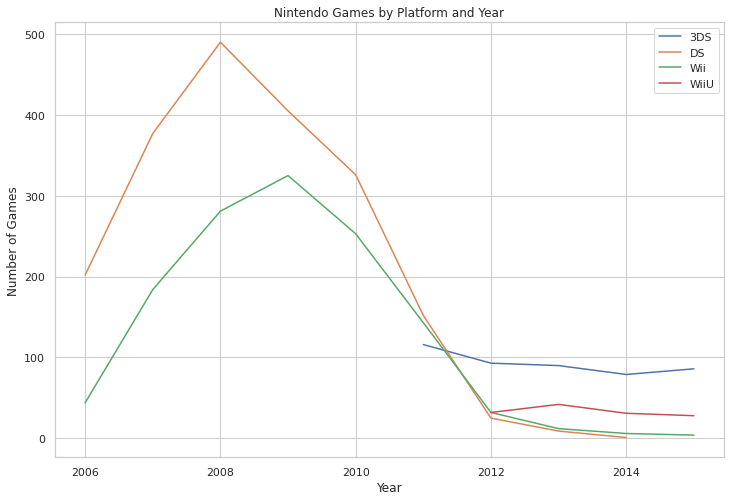

In [40]:
year_dev = df[['Year', 'Developer', 'Platform']]
year_dev = df[df['Year']>2005]
nin_df = year_dev[year_dev['Developer'] == 'Nintendo']
nin_df_grouped = nin_df.groupby(['Platform', 'Year']).size().reset_index(name='Count')


plt.figure(figsize=(12,8))


platforms = ['3DS', 'DS', 'Wii', 'WiiU']


for platform in platforms:
    platform_data = nin_df_grouped[nin_df_grouped['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['Count'], label=platform)


plt.title('Nintendo Games by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend()

plt.show()

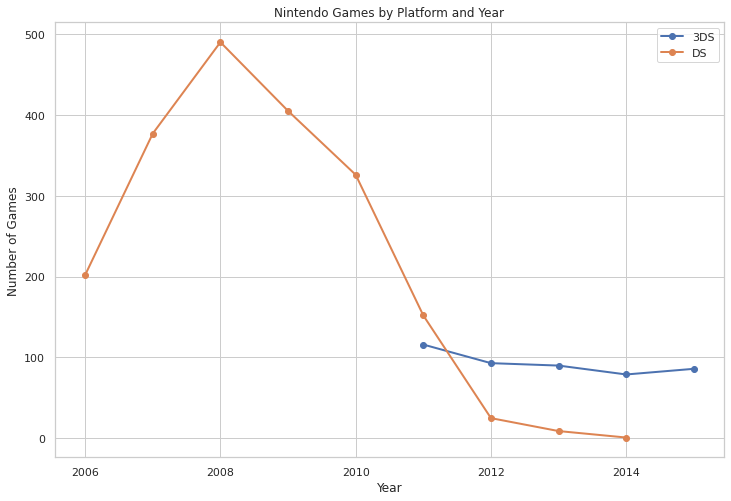

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

platforms = ['3DS', 'DS']

for platform in platforms:
    platform_data = nin_df_grouped[nin_df_grouped['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['Count'], label=platform, linewidth=2, marker='o')

plt.title('Nintendo Games by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend()

plt.show()


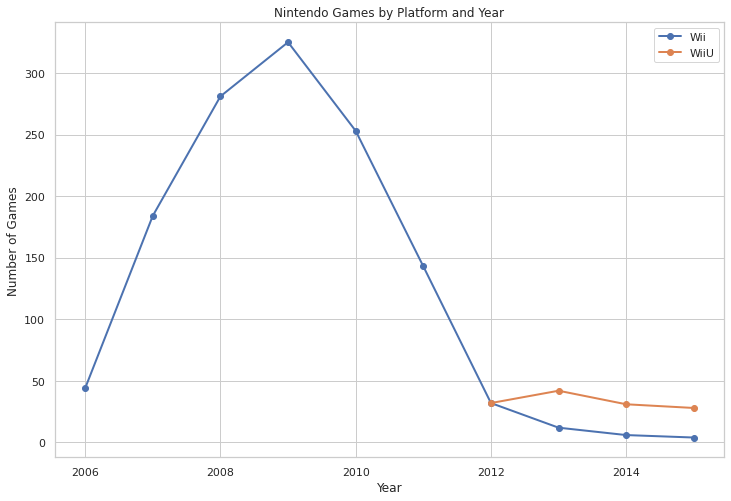

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

platforms = ['Wii', 'WiiU']

for platform in platforms:
    platform_data = nin_df_grouped[nin_df_grouped['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['Count'], label=platform, linewidth=2, marker='o')

plt.title('Nintendo Games by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend()

plt.show()
